In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100 !important; }</style>"))

In [2]:
#Importing all important libraries
import pandas as pd
import numpy as np

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the data set
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Checking the shape of the data set
df.shape

(1599, 12)

In [6]:
# columns name

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()  #provide the the info of every column in short form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()  #checking the null value in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

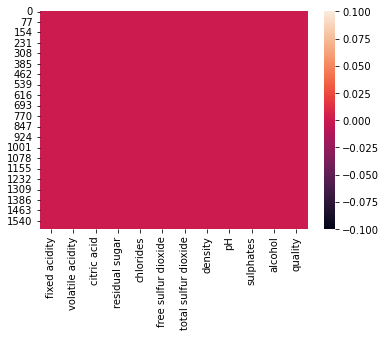

In [9]:
sns.heatmap(df.isnull())  # plotting the null value using heatmap

In [10]:
df['quality'].value_counts() #counting the different variables in the target 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:ylabel='Frequency'>

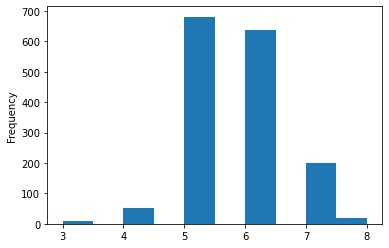

In [11]:
df['quality'].plot.hist()  #plotting the counts in target column

from the above graph we can see that the dataset is imbalanced and we have to balanced it

In [12]:
#separating the dependent and independent variable for balancing the class

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
!pip install imblearn

In [14]:
# importing smote for balancing the dataset

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [15]:
train_x.shape

(4086, 11)

In [16]:
train_y.shape

(4086,)

<AxesSubplot:xlabel='quality', ylabel='count'>

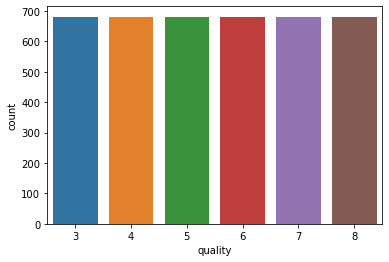

In [17]:
sns.countplot(train_y)

Now data is balanced.

In [18]:
x=train_x
y=train_y

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,10.906329,0.442848,0.578143,3.494091,0.075502,5.343881,17.031644,0.997750,3.174072,0.663755,11.825315
4082,9.127574,0.402414,0.425172,2.000981,0.068502,5.748774,13.004903,0.995673,3.299755,0.679951,11.524142
4083,8.864317,0.420028,0.307701,2.106488,0.073708,37.870242,59.029629,0.994334,3.227785,0.686784,12.264598
4084,10.003063,0.397292,0.482708,2.575109,0.071493,5.746719,16.248906,0.995993,3.162445,0.667423,11.522703


In [20]:
y

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [21]:
# Creating the dataframe with our balanced datadset

df_new=pd.DataFrame(data=x)
df_new['quality']=y
df=df_new
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,10.906329,0.442848,0.578143,3.494091,0.075502,5.343881,17.031644,0.997750,3.174072,0.663755,11.825315,8
4082,9.127574,0.402414,0.425172,2.000981,0.068502,5.748774,13.004903,0.995673,3.299755,0.679951,11.524142,8
4083,8.864317,0.420028,0.307701,2.106488,0.073708,37.870242,59.029629,0.994334,3.227785,0.686784,12.264598,8
4084,10.003063,0.397292,0.482708,2.575109,0.071493,5.746719,16.248906,0.995993,3.162445,0.667423,11.522703,8


# statistical summary

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,8.369913,0.582183,0.272208,2.592615,0.088253,13.330151,36.387912,0.996540,3.327646,0.658832,10.707648,5.500000
std,1.661281,0.242460,0.202051,1.199305,0.042824,9.651617,28.514401,0.001863,0.153450,0.155397,1.167974,1.708034
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.386492,0.070401,1.954065,0.069800,5.965124,15.376106,0.995457,3.217218,0.550000,9.781230,4.000000
50%,8.000000,0.540000,0.269841,2.200000,0.078854,10.544188,27.000000,0.996561,3.320000,0.630000,10.550169,5.500000
75%,9.413024,0.725000,0.440000,2.754142,0.091000,17.597925,48.000000,0.997688,3.429885,0.746398,11.499210,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Correlation

In [23]:
corr=df.corr().transpose()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.328226,0.733505,0.100770,0.110467,-0.104079,-0.111978,0.646697,-0.722272,0.225073,-0.116183,0.182284
volatile acidity,-0.328226,1.000000,-0.650134,0.095626,0.198616,-0.180378,-0.118646,0.072819,0.478542,-0.475311,-0.258067,-0.681064
citric acid,0.733505,-0.650134,1.000000,0.072678,0.091725,0.012529,0.050847,0.301069,-0.686581,0.444193,0.160241,0.478398
residual sugar,0.100770,0.095626,0.072678,1.000000,0.005437,0.005695,0.080694,0.327253,-0.016062,-0.058374,0.084424,-0.051449
chlorides,0.110467,0.198616,0.091725,0.005437,1.000000,-0.009042,-0.034189,0.265828,-0.161860,0.163325,-0.345959,-0.335307
free sulfur dioxide,-0.104079,-0.180378,0.012529,0.005695,-0.009042,1.000000,0.716893,-0.085960,0.021205,0.161950,0.006561,0.105216
total sulfur dioxide,-0.111978,-0.118646,0.050847,0.080694,-0.034189,0.716893,1.000000,-0.022519,-0.049185,0.128588,-0.073750,0.058031
density,0.646697,0.072819,0.301069,0.327253,0.265828,-0.085960,-0.022519,1.000000,-0.312181,0.022900,-0.581602,-0.319710
pH,-0.722272,0.478542,-0.686581,-0.016062,-0.161860,0.021205,-0.049185,-0.312181,1.000000,-0.302958,0.127831,-0.342965
sulphates,0.225073,-0.475311,0.444193,-0.058374,0.163325,0.161950,0.128588,0.022900,-0.302958,1.000000,0.244682,0.480720


<AxesSubplot:>

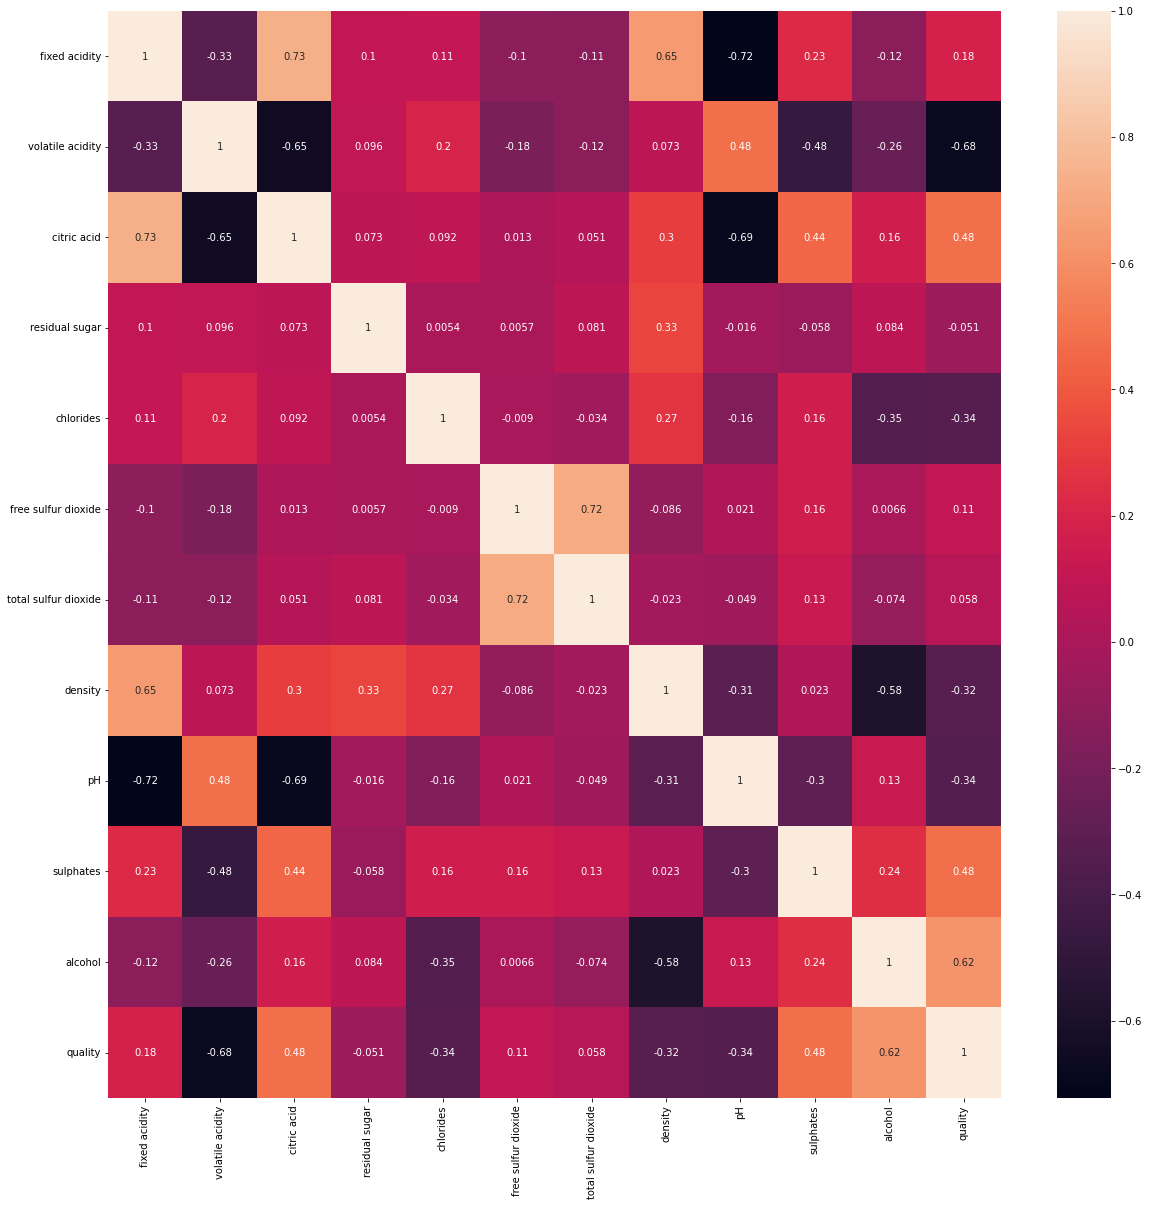

In [24]:
# plotting the correlation

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [25]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.621137
sulphates               0.480720
citric acid             0.478398
fixed acidity           0.182284
free sulfur dioxide     0.105216
total sulfur dioxide    0.058031
residual sugar         -0.051449
density                -0.319710
chlorides              -0.335307
pH                     -0.342965
volatile acidity       -0.681064
Name: quality, dtype: float64

# Data visualization

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

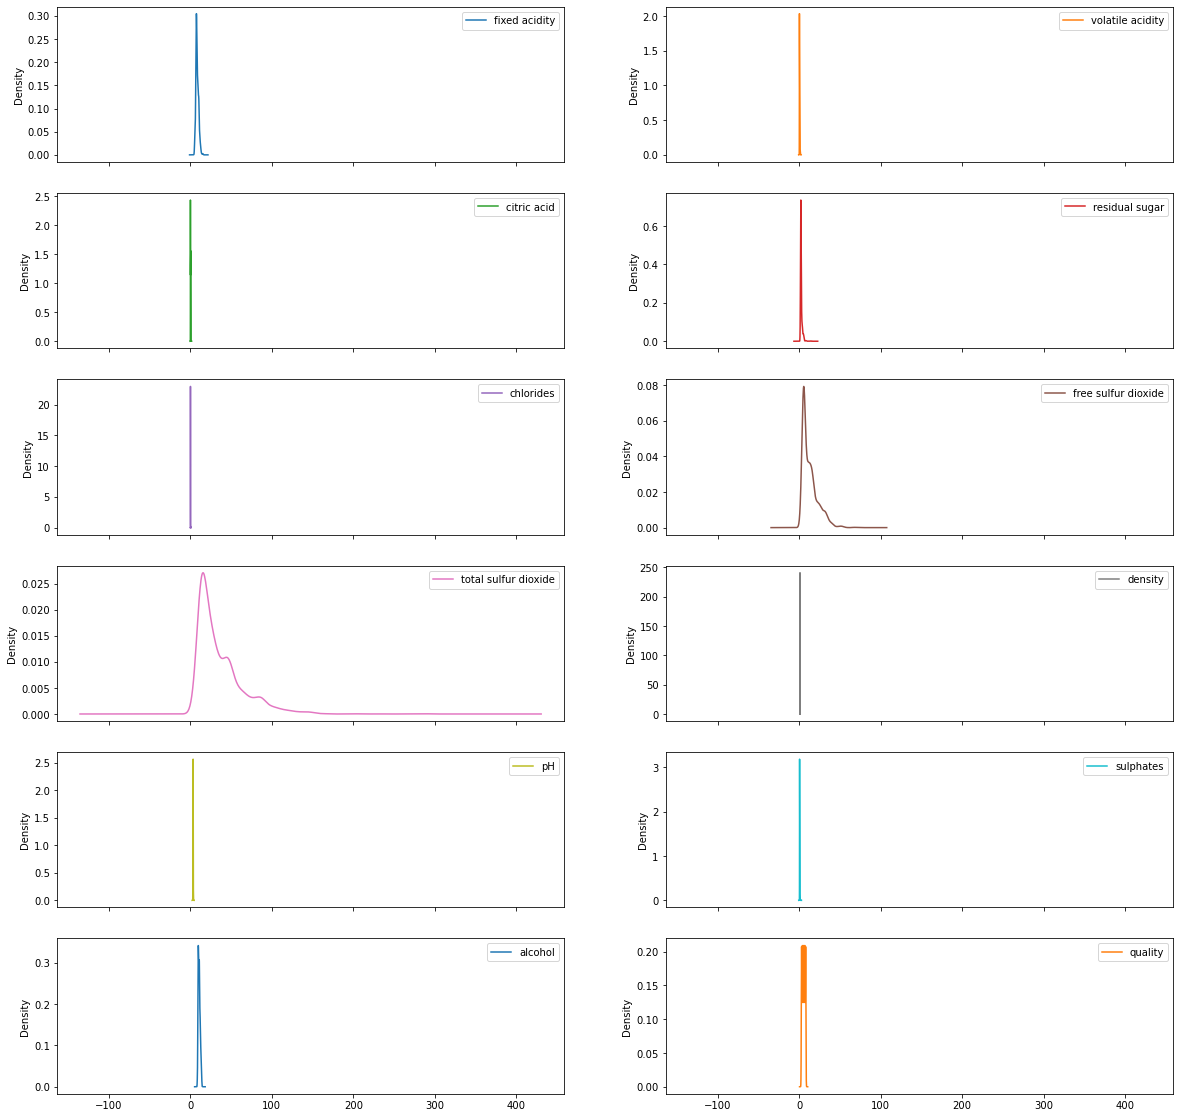

In [26]:
df.plot(kind='density',subplots=True, layout=(6,2),figsize=(20,20))

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

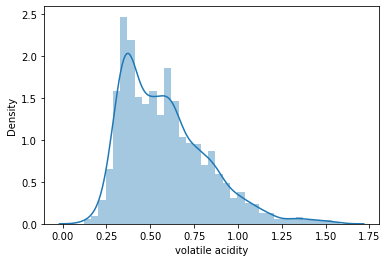

In [27]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

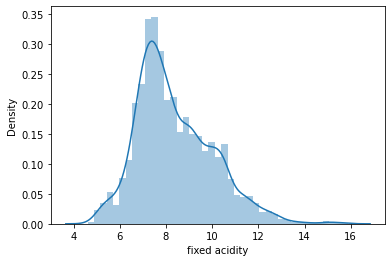

In [28]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

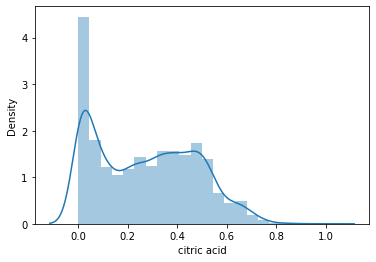

In [29]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

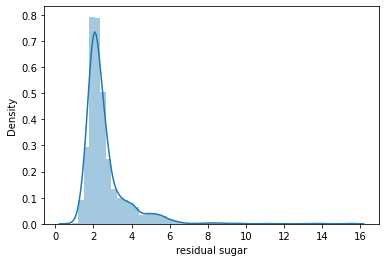

In [30]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

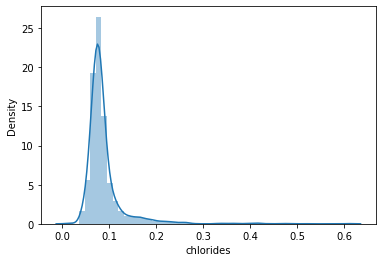

In [31]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='density', ylabel='Density'>

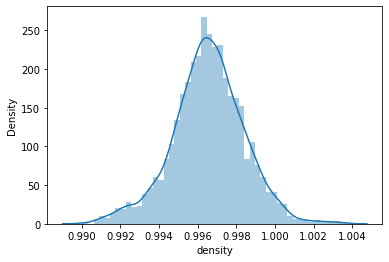

In [32]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

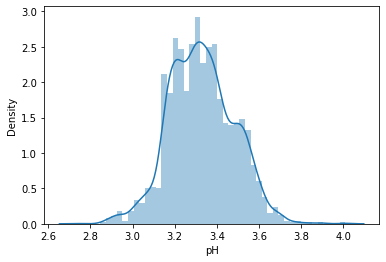

In [33]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

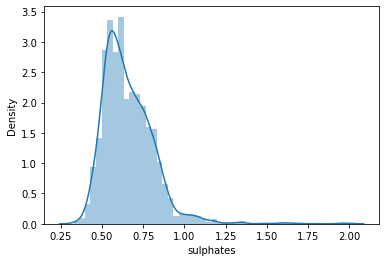

In [34]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

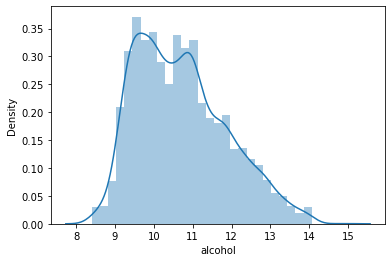

In [35]:
sns.distplot(df['alcohol'])

we have skewness in data.

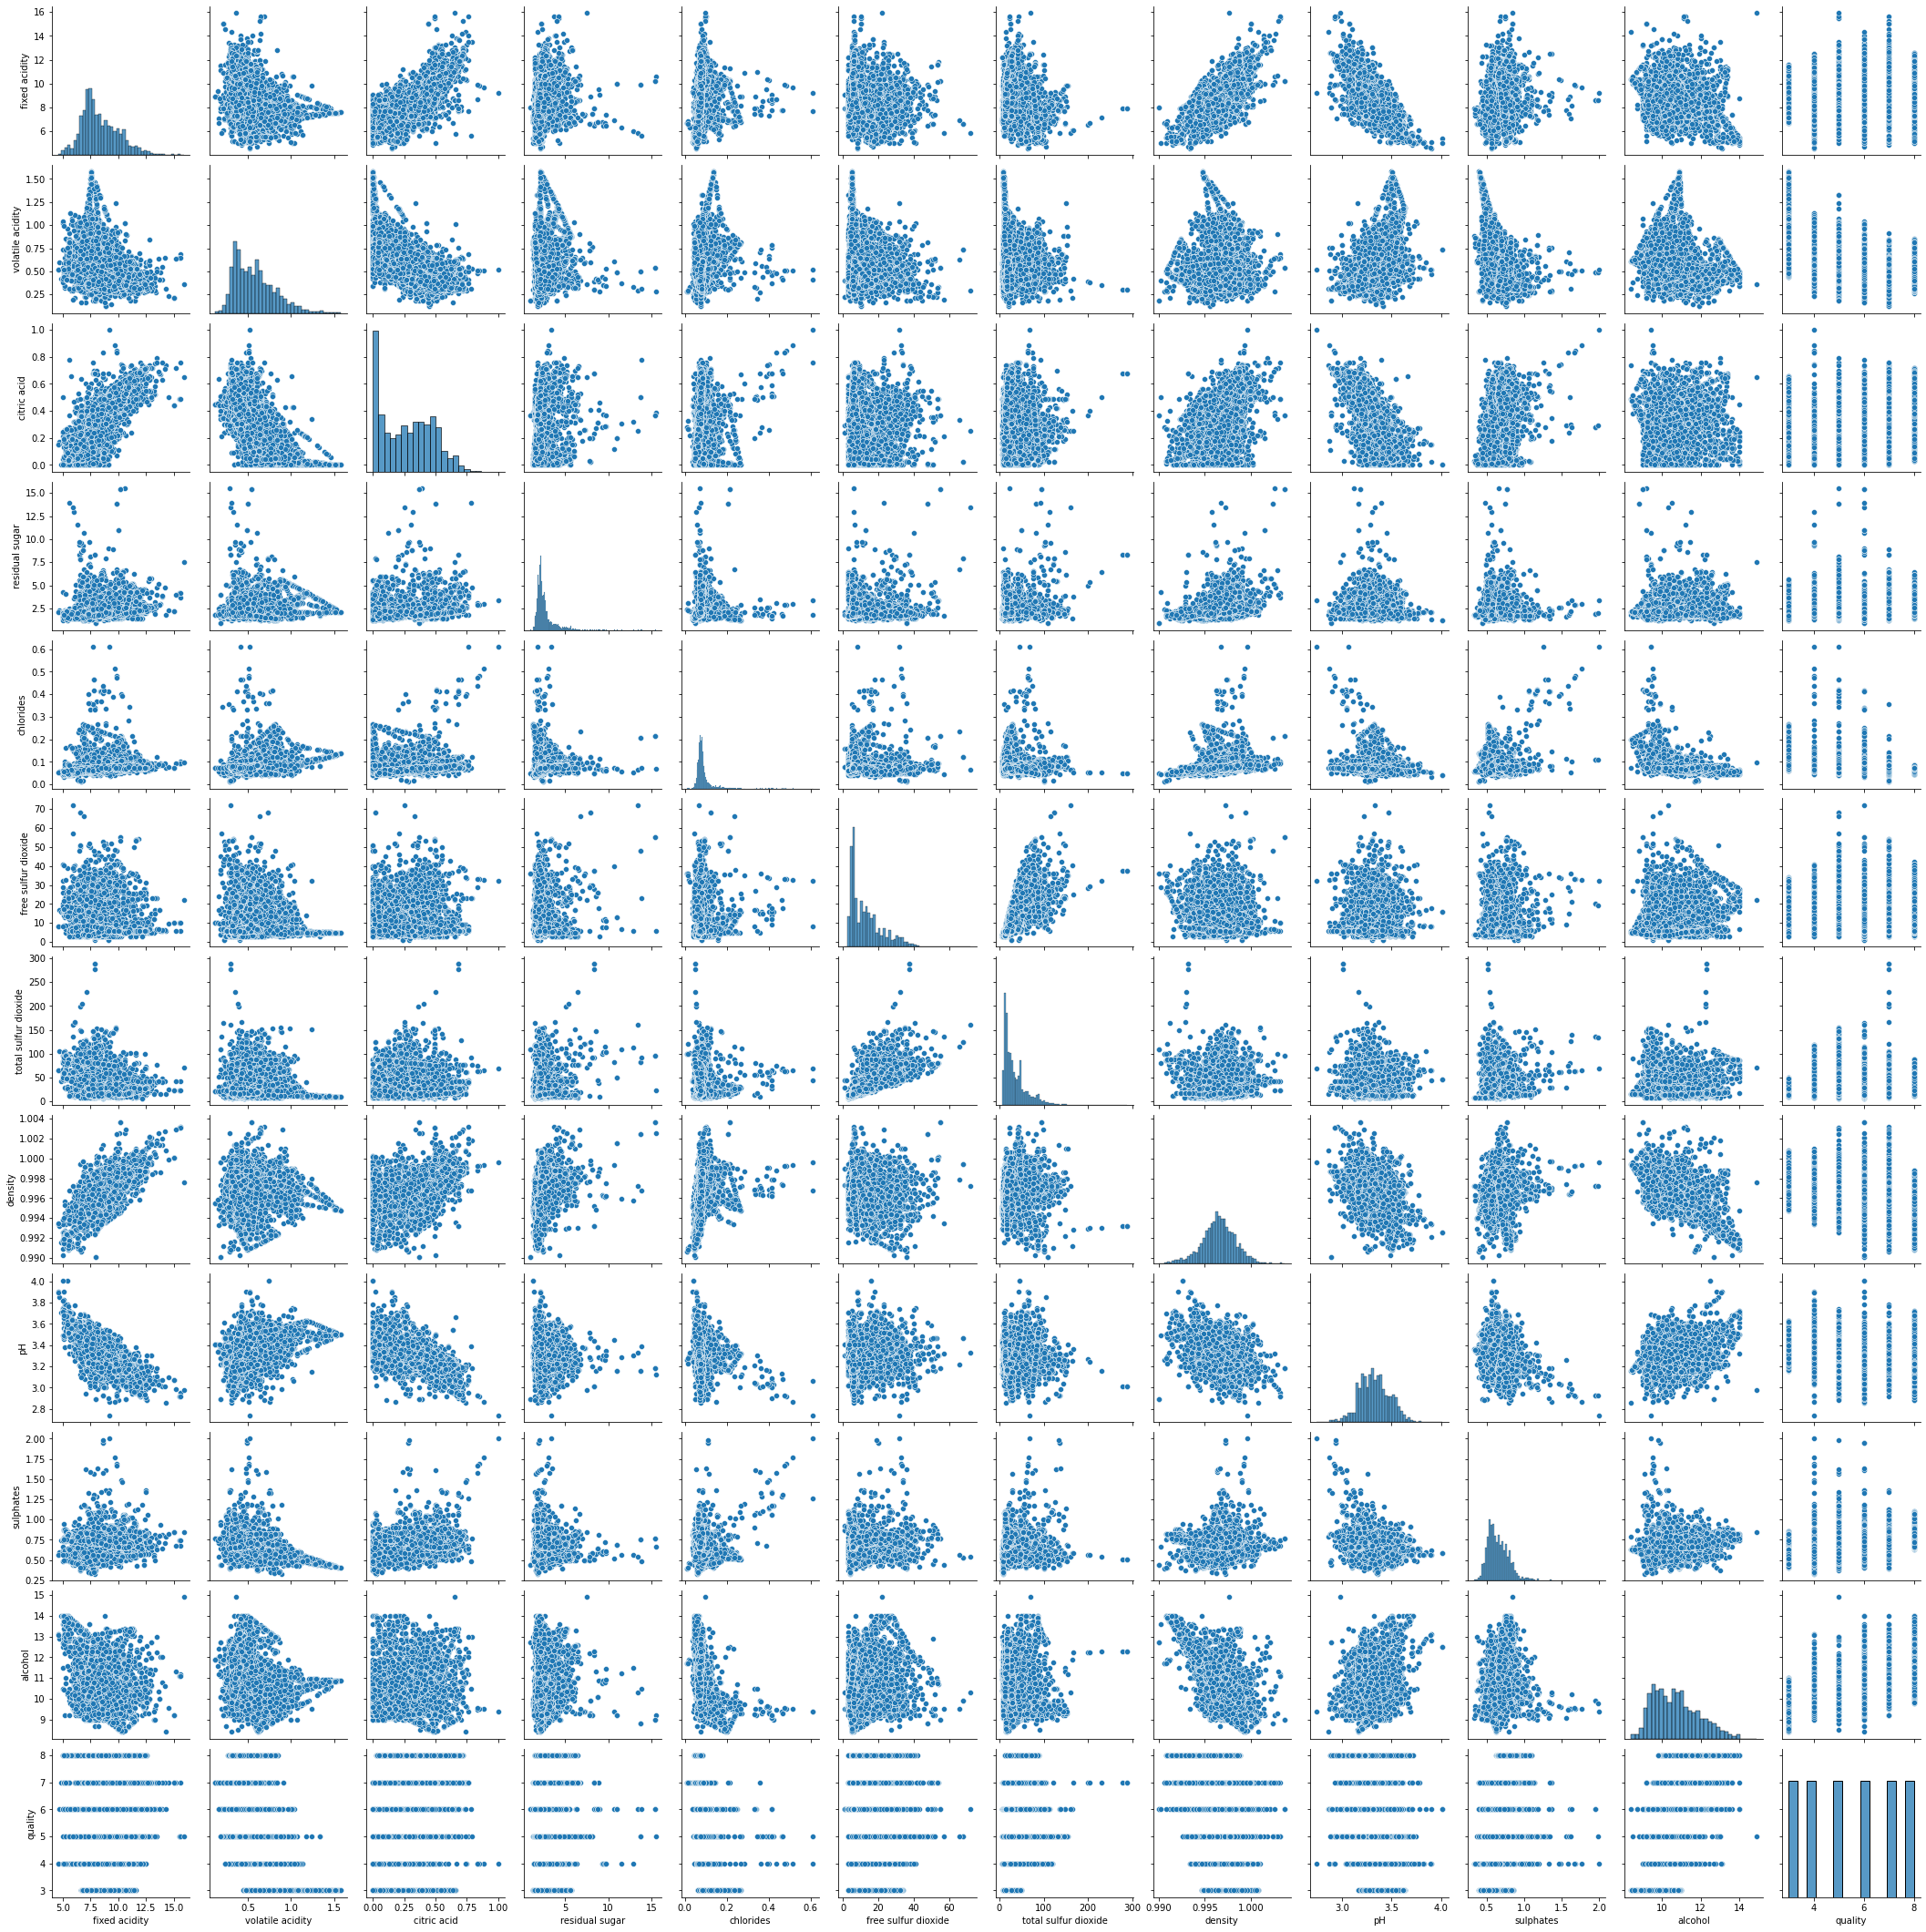

In [36]:
sns.pairplot(df)

In [37]:
x.skew()

fixed acidity           0.747593
volatile acidity        0.973511
citric acid             0.238572
residual sugar          3.707454
chlorides               4.723755
free sulfur dioxide     1.435012
total sulfur dioxide    1.979266
density                -0.107022
pH                      0.119134
sulphates               1.871945
alcohol                 0.557658
quality                 0.000000
dtype: float64

In [38]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

fixed acidity           0.004359
volatile acidity        0.057302
citric acid             0.012196
residual sugar          0.042576
chlorides              -0.053273
free sulfur dioxide     0.049404
total sulfur dioxide    0.054637
density                 0.006668
pH                     -0.000083
sulphates               0.006548
alcohol                 0.044454
quality                -0.084322
dtype: float64

# checking outliers

fixed acidity              AxesSubplot(0.125,0.772143;0.352273x0.107857)
volatile acidity        AxesSubplot(0.547727,0.772143;0.352273x0.107857)
citric acid                AxesSubplot(0.125,0.642714;0.352273x0.107857)
residual sugar          AxesSubplot(0.547727,0.642714;0.352273x0.107857)
chlorides                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
free sulfur dioxide     AxesSubplot(0.547727,0.513286;0.352273x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.383857;0.352273x0.107857)
density                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
pH                         AxesSubplot(0.125,0.254429;0.352273x0.107857)
sulphates               AxesSubplot(0.547727,0.254429;0.352273x0.107857)
alcohol                       AxesSubplot(0.125,0.125;0.352273x0.107857)
quality                    AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

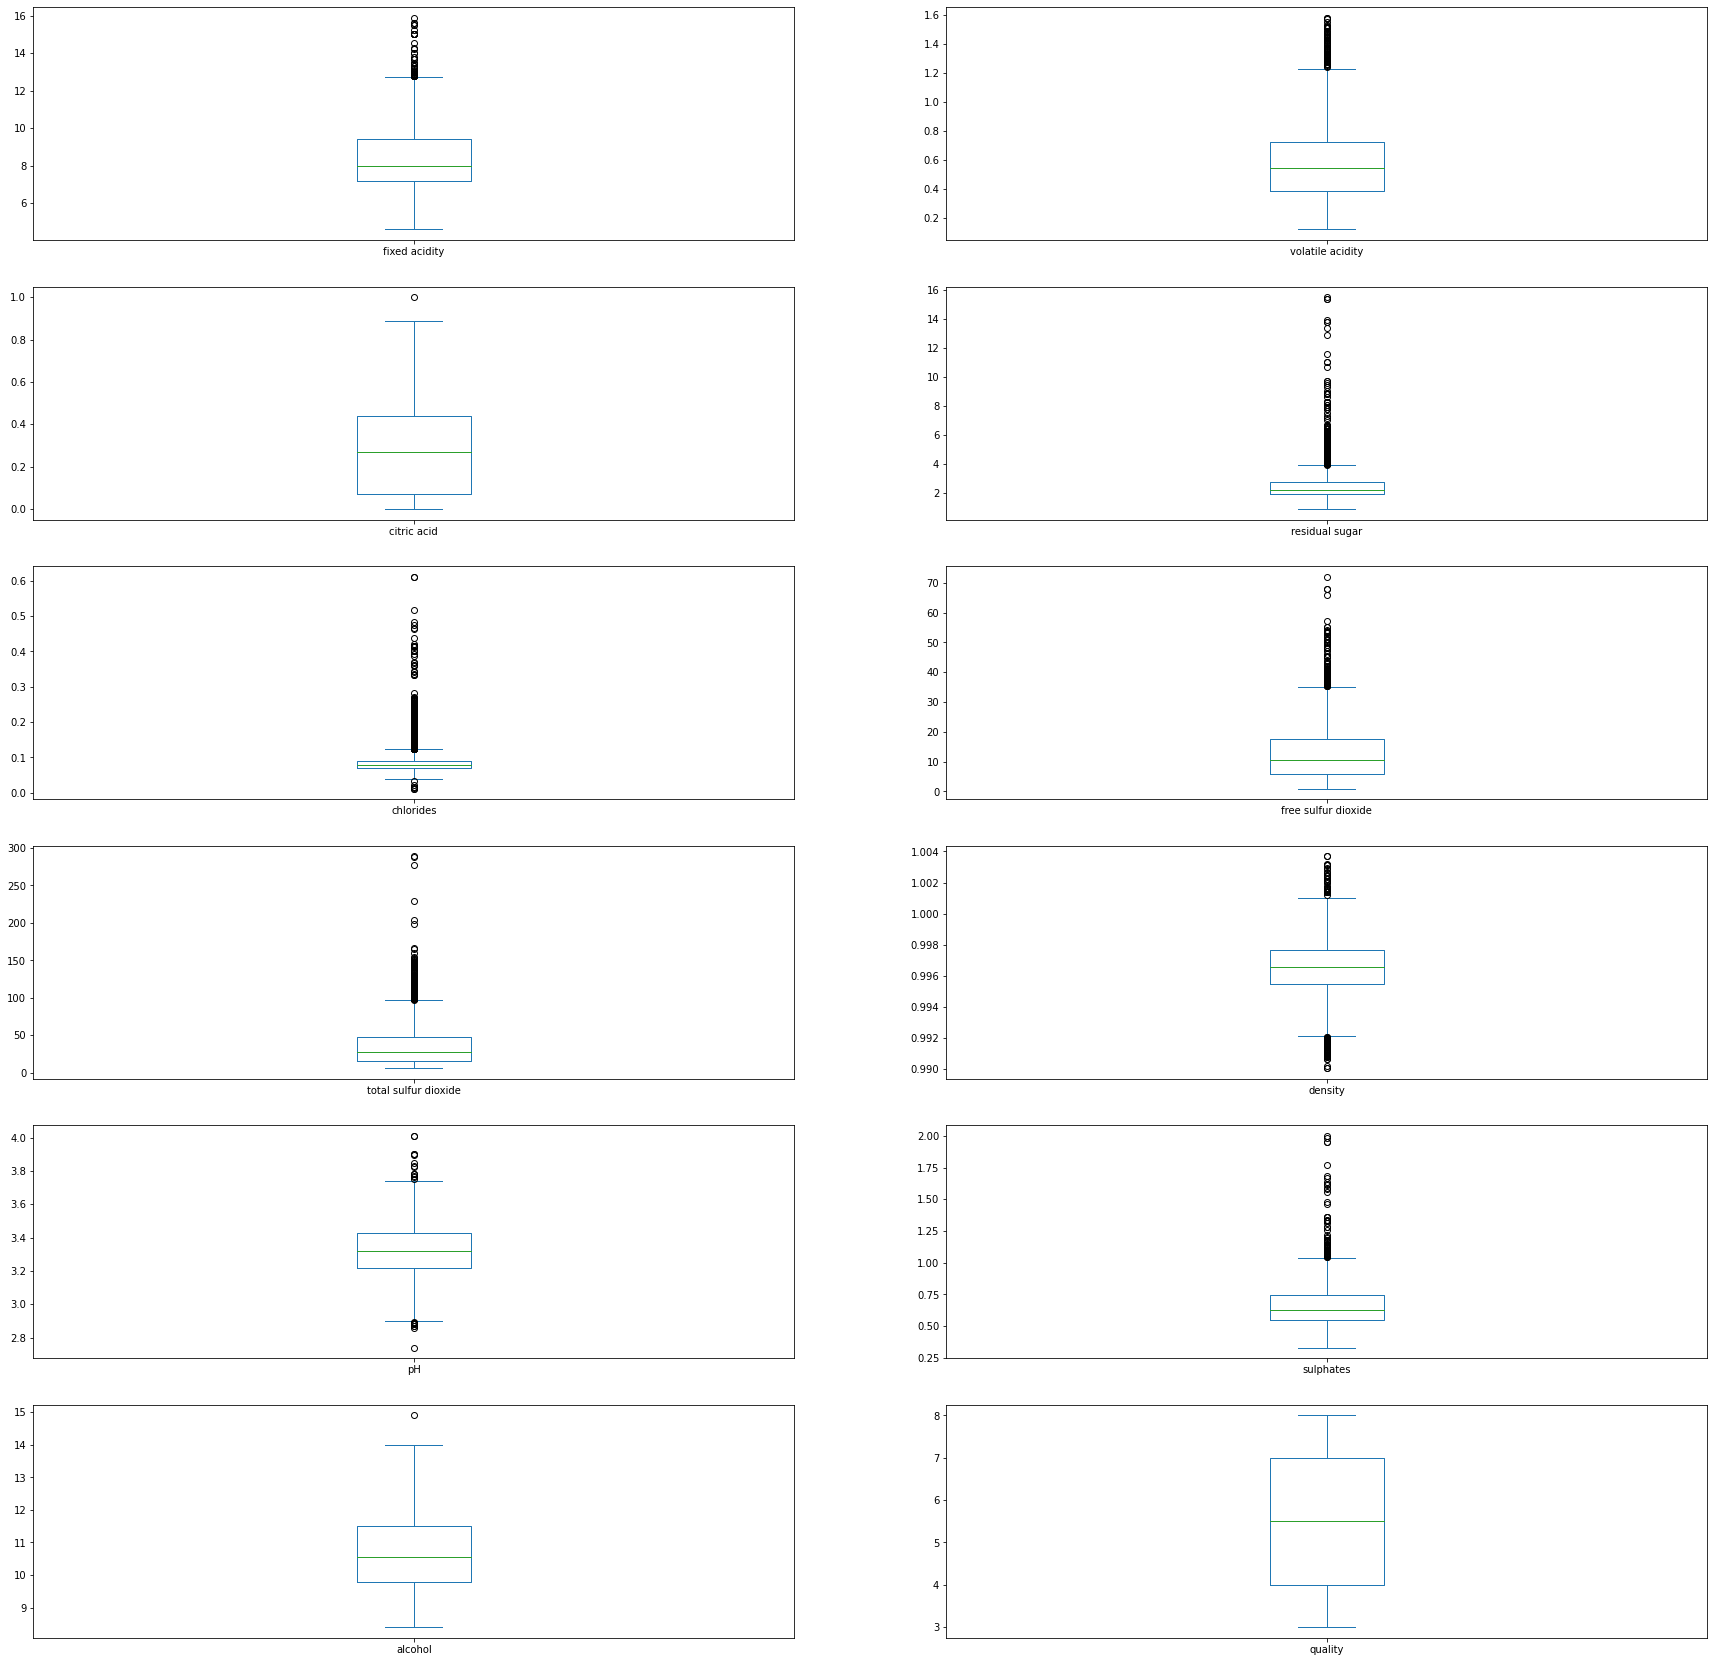

In [39]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(30,30))

we have many outliers in data

Applying Z score to remove outliers

In [40]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  13,   14,   14,   15,   15,   17,   17,   19,   33,   42,   43,
         45,   57,   81,   81,   83,   83,   86,   86,   88,   88,   90,
         91,   91,   92,   92,   95,  106,  106,  109,  126,  127,  130,
        145,  147,  151,  151,  151,  151,  154,  155,  156,  157,  163,
        164,  169,  169,  181,  188,  189,  190,  192,  201,  219,  226,
        226,  240,  243,  244,  258,  258,  274,  278,  281,  291,  313,
        324,  325,  328,  339,  340,  347,  353,  354,  364,  366,  369,
        374,  377,  378,  381,  391,  396,  396,  396,  400,  400,  400,
        413,  414,  415,  415,  417,  442,  442,  451,  463,  480,  480,
        494,  497,  501,  502,  515,  515,  522,  522,  523,  541,  544,
        544,  554,  554,  555,  555,  557,  557,  566,  567,  568,  584,
        591,  595,  608,  614,  634,  636,  637,  639,  649,  649,  651,
        652,  652,  652,  666,  672,  678,  684,  692,  692,  693,  694,
        695,  723,  723,  730,  741,  754,  771,  

(3752, 12)

Setting a cutoff for the target value: greater than 6 is 1 or good and less than 6 is 0 or bad quality wine

In [41]:
df['cut off quality']=df.quality.map(lambda x:1 if x>6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cut off quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [42]:
#separating the variables after setting the cutoff

x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [43]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.59663345,  0.5559205 , -1.35821145, ...,  1.20657853,
        -0.7156351 , -1.142365  ],
       [-0.34706059,  1.3532413 , -1.35821145, ..., -0.88987698,
         0.20769836, -0.79957188],
       [-0.34706059,  0.8216941 , -1.15641185, ..., -0.4841114 ,
        -0.023135  , -0.79957188],
       ...,
       [ 0.3170008 , -0.68423179,  0.19413772, ..., -0.70197061,
         0.25989877,  1.31254602],
       [ 1.02750109, -0.78494198,  1.07704475, ..., -1.14385034,
         0.11092865,  0.67675495],
       [ 0.90441248, -0.18588156,  1.3600319 , ..., -0.72997539,
         0.48093587,  1.62969142]])

In [44]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

# Finding the best random state

In [46]:
model=[lg,rdc,svc,dtc,knc]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)
    

Best Accuracy score is 0.9218472468916519 on random state 45


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=.30)

# Logistic regression

In [48]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.911190053285968
Confusion Matrix:  
 [[664  53]
 [ 47 362]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       717
           1       0.87      0.89      0.88       409

    accuracy                           0.91      1126
   macro avg       0.90      0.91      0.90      1126
weighted avg       0.91      0.91      0.91      1126



Decision tree classifier

In [49]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9342806394316163
Confusion Matrix:  
 [[683  34]
 [ 40 369]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       717
           1       0.92      0.90      0.91       409

    accuracy                           0.93      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.93      0.93      0.93      1126



Support vector classifier

In [50]:
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9316163410301954
Confusion Matrix:  
 [[677  40]
 [ 37 372]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       717
           1       0.90      0.91      0.91       409

    accuracy                           0.93      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.93      0.93      0.93      1126



In [51]:
rdc.fit(x_train,y_train)
pred=rdc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9609236234458259
Confusion Matrix:  
 [[695  22]
 [ 22 387]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       717
           1       0.95      0.95      0.95       409

    accuracy                           0.96      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.96      0.96      0.96      1126



In [52]:
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9413854351687388
Confusion Matrix:  
 [[671  46]
 [ 20 389]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       717
           1       0.89      0.95      0.92       409

    accuracy                           0.94      1126
   macro avg       0.93      0.94      0.94      1126
weighted avg       0.94      0.94      0.94      1126



# Cross Val Score

In [53]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(rdc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)


at cv=  2
cross val score =  89.52558635394456
at cv=  3
cross val score =  93.1786410871303
at cv=  4
cross val score =  92.5639658848614
at cv=  5
cross val score =  93.76671105193076
at cv=  6
cross val score =  93.9259637912673
at cv=  7
cross val score =  94.50959488272922


# Hyper meter tuning


In [54]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[4,5,6,7,8],
      'criterion':['gini','entropy']}

GCV=GridSearchCV(rdc,param,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9511545293072824

# ROC AUC curve

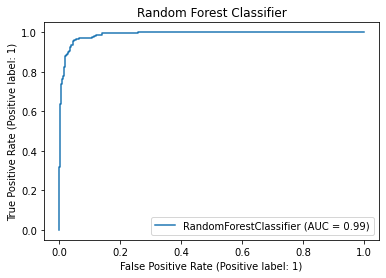

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Random Forest Classifier')
plt.show()

In [57]:
import pickle
filename='Wine_.pkl'
pickle.dump(lg, open(filename,'wb'))